<a href="https://colab.research.google.com/github/hhidayatinc/PCVK_Martikulasi_2022/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Transformasi Linier Brightness**

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 40


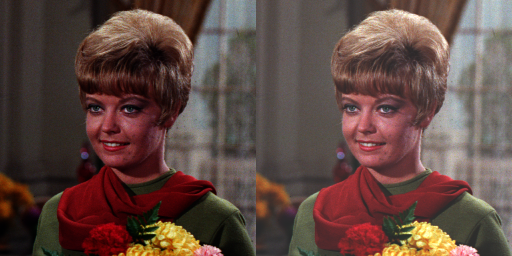

In [65]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, berta+brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**Tugas Praktikum 1 "Transformasi Contrast"**

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


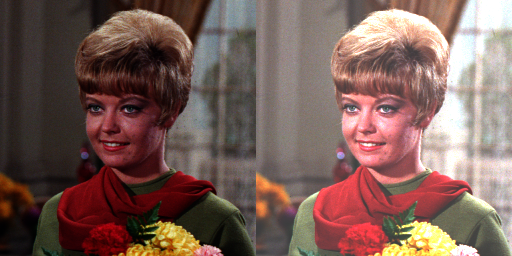

In [ ]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
except ValueError:
  print('Error, not a number')

try:
  kontras = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
img1 = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      img1[y,x,c,] = np.clip(kontras * original[y,x,c] + brightness, 0, 255)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, berta+brightness)

final_frame = cv.hconcat((original, img1))
cv2_imshow(final_frame)

**Tugas Praktikum 2 "Transformasi Logarithmic Brightness"**

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------
Masukkan nilai kecerahan: 40


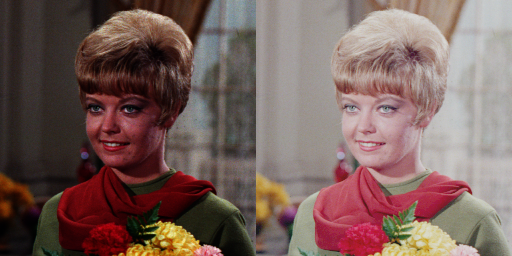

In [ ]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#Cara Simple
#log_image = brightness * (np.log(original + 1))
#log_image = np.array(log_image, dtype = np.uint8)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      log_image[y,x,c,] = np.clip(brightness * (np.log(original[y,x,c] + 1)), 0, 255)
      log_image = np.array(log_image, dtype = np.uint8)
#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta+brightness)

final_frame = cv.hconcat((original, log_image))
cv2_imshow(final_frame)

**Tugas Praktikum 3 "Transformasi Grayscale"**

a. Average = (R+G+B)/3

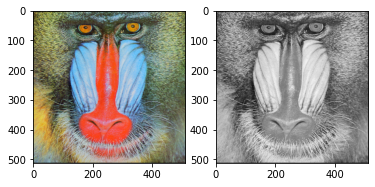

In [91]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
img_avg = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#ekstrak 3 channel baru 
GrayAvg = np.mean(img_avg, axis=2)

f, axarr = plt.subplots(1,2) #membuat 2 plot untuk citra input dan output
axarr[0].imshow(img_avg)
axarr[1].imshow(GrayAvg, cmap='gray')

b. Lightness = max[R,G,B]/2 + min[R,G,B]/2

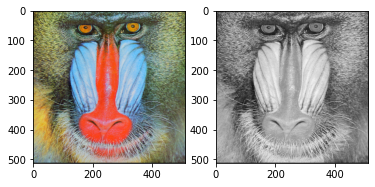

In [74]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
img_light = cv.cvtColor(img, cv.COLOR_BGR2RGB)
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]
max_channels = np.maximum(np.maximum(R,G),B) #np.max(img, axis=2)
min_channels = np.minimum(np.minimum(R,G),B) #np.min(img, axis=2)
GrayLight = max_channels/2 + min_channels/2

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_light)
axarr[1].imshow(GrayLight, cmap='gray')

C. Luminance = (0.21 * R) + (0.72 * G) + (0.07 * B)

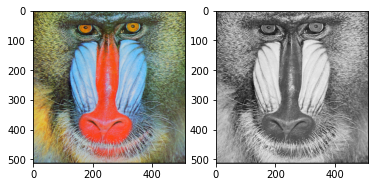

In [73]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
img_luminance = cv.cvtColor(img, cv.COLOR_BGR2RGB)
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]
GrayLuminance = (0.21 * R) + (0.72 * G) + (0.07 * B)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_luminance)
axarr[1].imshow(GrayLuminance, cmap='gray')

**Tugas Praktikum "Mengubah warna tertentu"**

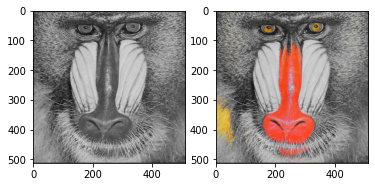

In [89]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

ret, mask = cv.threshold(img[:, :,0], 200, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask

# extracting `red` region using `biteise_and`
red = cv.bitwise_and(img, mask3)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img  = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# extracting non-red region
gray = cv.bitwise_and(img, 255 - mask3)

# red masked output
out = gray + red

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img)
axarr[1].imshow(out)